In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [2]:
# Import the data
pd.options.display.max_rows = 999
review = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
consumer = pd.read_csv("1429_1.csv")
# View data
review.head()


/Users/aa000131/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
consumer.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
for col in consumer.columns:
    print(col+",")
    

id,
name,
asins,
brand,
categories,
keys,
manufacturer,
reviews.date,
reviews.dateAdded,
reviews.dateSeen,
reviews.didPurchase,
reviews.doRecommend,
reviews.id,
reviews.numHelpful,
reviews.rating,
reviews.sourceURLs,
reviews.text,
reviews.title,
reviews.userCity,
reviews.userProvince,
reviews.username,


In [5]:
review.shape


(28332, 24)

In [6]:
consumer.shape

(34660, 21)

In [7]:
# Temp and Test
temp = review
test = consumer

In [8]:
permanent = temp[['reviews.rating' , 'asins', 'reviews.text' , 'reviews.title' , 'reviews.username','name']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()



test_permanent = test[['reviews.rating' ,'asins', 'reviews.text' , 'reviews.title' , 'reviews.username','name']]
print(test_permanent.isnull().sum()) #Checking for null values
test_permanent.head()
#ade changes here

reviews.rating      0
asins               0
reviews.text        0
reviews.title       0
reviews.username    0
name                0
dtype: int64
reviews.rating        33
asins                  2
reviews.text           1
reviews.title          5
reviews.username       2
name                6760
dtype: int64


,reviews.rating,asins,reviews.text,reviews.title,reviews.username,name
0,5.0,B01AHB9CN2,This product so far has not disappointed. My c...,Kindle,Adapter,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
1,5.0,B01AHB9CN2,great for beginner or experienced person. Boug...,very fast,truman,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
2,5.0,B01AHB9CN2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
3,4.0,B01AHB9CN2,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,5.0,B01AHB9CN2,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."


In [9]:
# Filter null values
check =  test_permanent
#check =  test_permanent[test_permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,asins,reviews.text,reviews.title,reviews.username,name
0,5.0,B01AHB9CN2,This product so far has not disappointed. My c...,Kindle,Adapter,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
1,5.0,B01AHB9CN2,great for beginner or experienced person. Boug...,very fast,truman,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
2,5.0,B01AHB9CN2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
3,4.0,B01AHB9CN2,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,5.0,B01AHB9CN2,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."


In [11]:
test = test_permanent
test["senti"] = test["reviews.rating"]>=4
test["senti"] = test["senti"].replace([True , False] , ["pos" , "neg"])

/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/4273094849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["senti"] = test["reviews.rating"]>=4
/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/4273094849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["senti"] = test["senti"].replace([True , False] , ["pos" , "neg"])


In [12]:
# Count of reviews for test
test["senti"].value_counts()



pos    32316
neg     2344
Name: senti, dtype: int64

<AxesSubplot:>

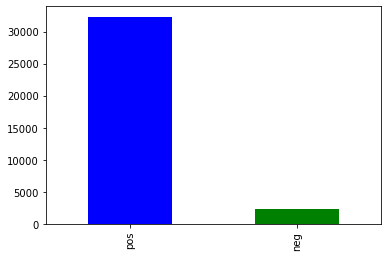

In [13]:
#Show bar for test
test["senti"].value_counts().plot.bar(color=['blue','green'])

In [14]:
# Filtering not null values
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,asins,reviews.text,reviews.title,reviews.username,name
0,3,"B00QWO9P0O,B00LH3DMUO",I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,AmazonBasics AAA Performance Alkaline Batterie...
1,4,"B00QWO9P0O,B00LH3DMUO",Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,AmazonBasics AAA Performance Alkaline Batterie...
2,5,"B00QWO9P0O,B00LH3DMUO",Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,AmazonBasics AAA Performance Alkaline Batterie...
3,5,"B00QWO9P0O,B00LH3DMUO",Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,AmazonBasics AAA Performance Alkaline Batterie...
4,5,"B00QWO9P0O,B00LH3DMUO",These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,AmazonBasics AAA Performance Alkaline Batterie...


In [15]:
# Classifying text as positive and negative
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

In [16]:
senti["senti"].value_counts()

pos    25545
neg     2787
Name: senti, dtype: int64

<AxesSubplot:>

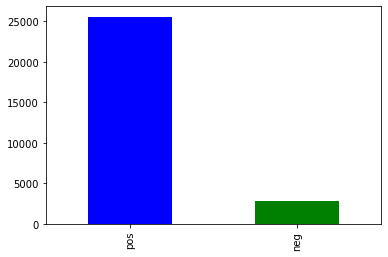

In [17]:
# Count of reviews
senti["senti"].value_counts().plot.bar(color=['blue','green'])

In [18]:
# Cleaning the Text

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
   # sentence = " ".join(nltk.word_tokenize(sentence))
    sentence = " ".join(tokenizer.tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/3150032217.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Summary_Clean"] = check["reviews.text"].apply(cleanup)


In [19]:
# Splitting Train and Test Data
split = senti[["Summary_Clean" , "senti",'asins','name']]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [20]:
# Feature Extracter for NLTK Naive Bayes Classifier
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [21]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])

prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/3679537943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["words"] = check["Summary_Clean"].str.lower().str.split()


NLTK Naive bayes Accuracy : 0.6528415107659725
Most Informative Features
                   worst = True              neg : pos    =    101.8 : 1.0
                    dies = True              neg : pos    =     83.3 : 1.0
                  ruined = True              neg : pos    =     57.4 : 1.0
                    acid = True              neg : pos    =     54.2 : 1.0
                terrible = True              neg : pos    =     51.1 : 1.0


In [22]:
# Prediciting result of NLTK Classifier
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/3726369751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Naive"] = y1


In [23]:
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove("not")
count_vect = CountVectorizer(min_df=5,stop_words=stopwords ,ngram_range=(1,1))
#count_vect = CountVectorizer(min_df=3,stop_words=stopwords ,ngram_range=(2,2))
#count_vect = CountVectorizer(min_df=2,ngram_range=(3,3))
#count_vect = CountVectorizer(min_df=5, ngram_range=(2,3))
#count_vect = CountVectorizer(min_df=5,stop_words=stopwords ,ngram_range=(3,3))
count_vect = CountVectorizer(min_df=5,stop_words=stopwords ,ngram_range=(1,5))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

In [24]:
# Fitting Multinomial NB

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9179315213554535


/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/1256895146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


In [25]:
# Fitting BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.892340275326509


/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/3973599488.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


In [26]:
# Fitting Logistic Regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.9587010236498411


/Users/aa000131/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/126134101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for

In [27]:
# Get most occuring words
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef") 

,feature,coef
13197,terrible,-30.989015
11475,return,-29.064193
11483,returning,-25.560864
3159,dead,-24.391842
14903,worst,-24.054053
...,...,...
4272,far,21.051647
2804,complaints,22.049123
9938,perfect,23.821134
5688,great,24.256087


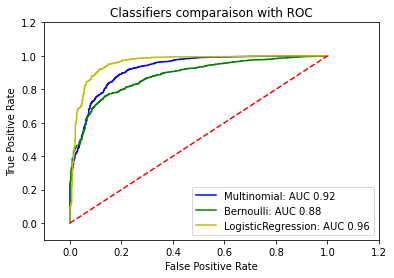

In [28]:
# What classifier is doing
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )

In [30]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       0.91      0.22      0.35       577
    negative       0.92      1.00      0.96      5089

    accuracy                           0.92      5666
   macro avg       0.91      0.61      0.65      5666
weighted avg       0.92      0.92      0.89      5666



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.47      0.47      0.47       577
    negative       0.94      0.94      0.94      5089

    accuracy                           0.89      5666
   macro avg       0.71      0.70      0.71      5666
weighted avg       0.89      0.89      0.89      5666



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.83      0.75      0.79       577
    negative       0.97      0.98      0.98      5089

    accuracy                           0.96      5666
   macro avg       0.90      0.87      0.88      5666
weighted avg       0.96

In [31]:
# Test the classifier with handwritten samples
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 1.000000, positive prob 0.000000
Sample estimated as NEG: negative prob 0.999984, positive prob 0.000016


In [32]:
# Predicted values of classifiers for check on the basis of review text
#pd.set_option('display.max_rows', None)
check

,reviews.rating,asins,reviews.text,reviews.title,reviews.username,name,senti,Summary_Clean,words,Naive,multi,Bill,log
0,5.0,B01AHB9CN2,This product so far has not disappointed. My c...,Kindle,Adapter,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",pos,this product so far has not disappointed my ch...,"[this, product, so, far, has, not, disappointe...",pos,pos,pos,pos
1,5.0,B01AHB9CN2,great for beginner or experienced person. Boug...,very fast,truman,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",pos,great for beginner or experienced person bough...,"[great, for, beginner, or, experienced, person...",pos,pos,pos,pos
2,5.0,B01AHB9CN2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",pos,inexpensive tablet for him to use and learn on...,"[inexpensive, tablet, for, him, to, use, and, ...",pos,pos,pos,pos
3,4.0,B01AHB9CN2,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",pos,i ve had my fire hd two weeks now and i love i...,"[i, ve, had, my, fire, hd, two, weeks, now, an...",neg,pos,pos,pos
4,5.0,B01AHB9CN2,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",pos,i bought this for my grand daughter when she c...,"[i, bought, this, for, my, grand, daughter, wh...",neg,pos,pos,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,3.0,B006GWO5WK,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,NaN,neg,this is not appreciably faster than any other ...,"[this, is, not, appreciably, faster, than, any...",neg,pos,neg,pos
34656,1.0,B006GWO5WK,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,NaN,neg,amazon should include this charger with the ki...,"[amazon, should, include, this, charger, with,...",neg,pos,pos,pos
34657,1.0,B006GWO5WK,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,NaN,neg,love my kindle fire but i am really disappoint...,"[love, my, kindle, fire, but, i, am, really, d...",neg,pos,neg,pos
34658,1.0,B006GWO5WK,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,NaN,neg,i was surprised to find it did not come with a...,"[i, was, surprised, to, find, it, did, not, co...",neg,pos,neg,pos


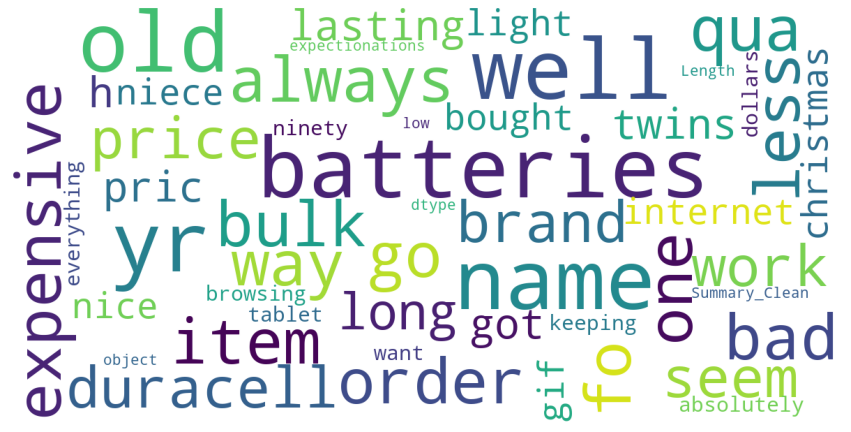

In [33]:
from wordcloud import WordCloud, STOPWORDS
#stopwords = set(STOPWORDS)
stopwords = nltk.corpus.stopwords.words('english')

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["Summary_Clean"])

In [34]:
#show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

# print(senti)

       reviews.rating                  asins  \
0      3               B00QWO9P0O,B00LH3DMUO   
1      4               B00QWO9P0O,B00LH3DMUO   
2      5               B00QWO9P0O,B00LH3DMUO   
3      5               B00QWO9P0O,B00LH3DMUO   
4      5               B00QWO9P0O,B00LH3DMUO   
...   ..                                 ...   
28327  5               B018T075DC              
28328  4               B018T075DC              
28329  5               B018T075DC              
28330  5               B018T075DC              
28331  4               B018T075DC              

                                                                                                                                                                                                                                                                                                                        reviews.text  \
0      I order 3 of them and one of the item is bad quality. Is missing backup spring so I have

/var/folders/h_/1mgwfjld34s51kqbmv0zfwyh0000gn/T/ipykernel_61623/4056470511.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [35]:
#show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negitive words")


In [36]:
# Identify separate products
a = review['asins'].unique()
a

# Count values of unique 
a = review['asins'].value_counts()
a

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
B018Y22C2Y                          1425
B018Y23MNM                          1212
B018Y22BI4                          1024
B018Y225IA                          987 
B01J94YIT6                          883 
B018Y224PY                          745 
B01BH83OOM                          601 
B00IOY8XWQ                          505 
B01J94SCAM                          293 
B017JG41PC                          287 
B01J94SBEY                          233 
B01J94T1Z2                          160 
B01AHBDCKQ                          156 
B01AHB9C1E                          156 
B01ACEKAJY                          140 
B01J94SWWU                          130 
B01AHB9CYG                          115 
B0189XZRTI,B0189XYY0Q,B0189XZ0KY    99  
B01IO618J8                          82  
B01AHBBG04      

In [37]:
a.nlargest(5)

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
Name: asins, dtype: int64

In [38]:
# Create DF
# fire_tab =review.loc[review['asins'] == 'B01AHB9CN2',['name', 'reviews.text', 'reviews.title','reviews.rating']]
# amzn_echo =review.loc[review['asins'] == 'B010CEHQTG',['name', 'reviews.text', 'reviews.title','reviews.rating']]
# amzn_echo_plus =review.loc[review['asins'] == 'B06XB29FPF',['name', 'reviews.text', 'reviews.title','reviews.rating']]
# fire_tab_kids =review.loc[review['asins'] == 'B018Y22C2Y',['name', 'reviews.text', 'reviews.title','reviews.rating']]
# new_kindle =review.loc[review['asins'] == 'B018Y225IA',['name', 'reviews.text', 'reviews.title','reviews.rating']]

In [39]:
# review.loc[review['asins'] == 'B018Y225IA','name']

In [40]:
a = senti['asins'].value_counts()
topFiveItems = a.nlargest(5)
topFiveItems

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
Name: asins, dtype: int64

In [41]:
a = senti['asins'].value_counts()
topFiveItems = a.nlargest(5)
topFiveItems

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
Name: asins, dtype: int64

In [42]:
myList = topFiveItems.index
myTopFiveDf = []
train.head()
def get_my_data(myList):
    for i in range(len(myList)):
        myDf = train.loc[train['asins']==myList[i],['Summary_Clean','name','senti']]
        myTopFiveDf.append(myDf)

get_my_data(myList)


In [43]:
topFiveItems

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
Name: asins, dtype: int64

In [50]:
def generateWordCloud(df,senti):
    for keys , values in enumerate(df):
        myDf = values
        product_title=myDf['name'].unique()
        title = "Postive Words for:"+product_title
        myItem = myDf.loc[myDf['senti']==senti]
        show_wordcloud(myItem['Summary_Clean'],title =myItem['name'].unique()+ ' '+ senti)
        print(myItem['name'].unique())
        print(senti)
        
    

In [51]:
generateWordCloud(myTopFiveDf,'neg')
generateWordCloud(myTopFiveDf,'pos')


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
